# Вопросы по матричным методам

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Сингулярное-разложение" data-toc-modified-id="Сингулярное-разложение-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Сингулярное разложение</a></span></li><li><span><a href="#Число-обусловленности" data-toc-modified-id="Число-обусловленности-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Число обусловленности</a></span></li><li><span><a href="#Расстояние-Махаланобиса" data-toc-modified-id="Расстояние-Махаланобиса-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расстояние Махаланобиса</a></span></li><li><span><a href="#Регрессия-L1" data-toc-modified-id="Регрессия-L1-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Регрессия L1</a></span></li></ul></div>

In [1]:
# Imports
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [2]:
# Styles
import matplotlib
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['lines.linewidth'] = 1.5
matplotlib.rcParams['lines.markersize'] = 4
cm = plt.cm.tab10  # Colormap

import seaborn
seaborn.set_style('whitegrid')

In [3]:
# import warnings
# warnings.filterwarnings('ignore')

# %config InlineBackend.figure_formats = ['pdf']
# %config Completer.use_jedi = False

---

## Сингулярное разложение

1. **Вопрос**: Как соотносятся собственные и сингулярные числа матрицы? \
   **Ответ**: В общем случае никак. \
   Но если $S$ &mdash; симметричная положительно определённая матрица, то $S = Q\Lambda Q^\top = U\Sigma V^\top$. \
   Если $S$ имеет отрицательные собственные числа ($S x = \lambda x$), то $\sigma = -\lambda$, а $u = -x$ или $v = -x$ (одно из двух). \
   (Strang, p. 61)

1. **Вопрос**: Рассмотрим матрицу $2 \times 2$. \
   В общем случае *4 разным элементам* (a, b, c, d) ставится в соответствие *4 геометрических параметра*: угол поворота ($\alpha$), два коэффициента растяжения ($\sigma_1, \sigma_2$), угол обратного поворота ($\beta$). \
   Но если матрица симметричная, то параметра уже 3 (a, b, b, d). Как в таком случае вычислить четвёрку ($\alpha$, $\sigma_1, \sigma_2$, $\beta$)? \
   **Ответ**: $\beta = -\alpha$. \
   (Strang, p. 62)
   
1. **Вопрос**: Какова связь между сингулярным и полярным разложением? \
   **Ответ**: $A = U \Sigma V^\top = (U V^\top)(V \Sigma V^\top) = Q S$ или $A = U \Sigma V^\top = (U \Sigma U^\top)(U V^\top) = K Q$. \
   (Strang, p. 67)
   
1. **Вопрос**: Какова связь между сингулярными числами и собственными числами матрицы $S$ в полярном разложении? \
   **Ответ**: Собственные числа $S$ &mdash; это сингулярные числа исходной матрицы $A$. \
   (Strang, p. 67)

---

## Число обусловленности

1. **Вопрос**: В рассматриваемом на лекции примере число обусловленности $\mu(A)=22.15$. Но выше мы нашли, что относительная погрешность увеличилась в $14.88$ раз. Почему так произошло? При каком условии оценка, сделанная по числу обусловленности, будет достигаться? \
   **Ответ**: Максимальная оценка будет достигаться, когда вектор $\mathbf{b}$ будет параллелен первому сингулярному вектору (первой главной компоненте). Минимальная &mdash; когда второму сингулярному вектору (см. иллюстрации ниже).

In [3]:
A = np.array([[1.0, 1.0],
              [1.0, 1.2]])

origin = [[0,0], [0,0]] # origin point

In [8]:
U, sgm, Vt = LA.svd(A)
mu = sgm[0]/sgm[1]
print('sigma = ', np.round(sgm, 3))
print('mu(A) = ', round(mu, 4))

sigma =  [2.105 0.095]
mu(A) =  22.1549


In [65]:
# Creating perturbed vectors B and solve system
# Solution
x = np.zeros((400, 1))
alpha = np.radians(45)
# b0 = 1.1*np.atleast_2d([np.cos(alpha), np.sin(alpha)]).T  # 1
b0 = -1.1*np.atleast_2d(U[:,0]).T  # 2
# b0 = -1.1*np.atleast_2d(U[:,1]).T  # 3
print(b0)
A_inv = LA.inv(A)
x0 = A_inv @ b0

# Noise
n = 200
np.random.seed(42)
r = 0.1*np.random.rand(n)
phi = 2*np.pi*np.random.rand(n)
B1 = b0[0] + r*np.cos(phi)
B2 = b0[1] + r*np.sin(phi)
B = np.vstack((B1, B2))
X = A_inv @ B

[[0.73810585]
 [0.81559779]]


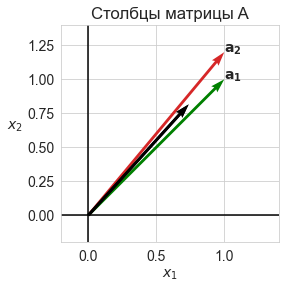

In [66]:
fig, ax1 = plt.subplots(1, 1, figsize=(4, 4))
plt.subplots_adjust(wspace=0.4)

# Plotting vectors
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.quiver(*origin, A[0,:], A[1,:], color=['g', cm(3)],
           width=0.013, angles='xy', scale_units='xy', scale=1)
ax1.quiver(*origin, b0[0,:], b0[1,:], color=['k'],
           width=0.013, angles='xy', scale_units='xy', scale=1)
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$', rotation=0, ha='right')
ax1.set_xlim([-0.2, 1.4])
ax1.set_ylim([-0.2, 1.4])
ax1.set_aspect('equal')
ax1.set_axisbelow(True)
ax1.set_title("Столбцы матрицы A")
ax1.text(*A[:,0], "$\mathbf{a_1}$")
ax1.text(*A[:,1], "$\mathbf{a_2}$");

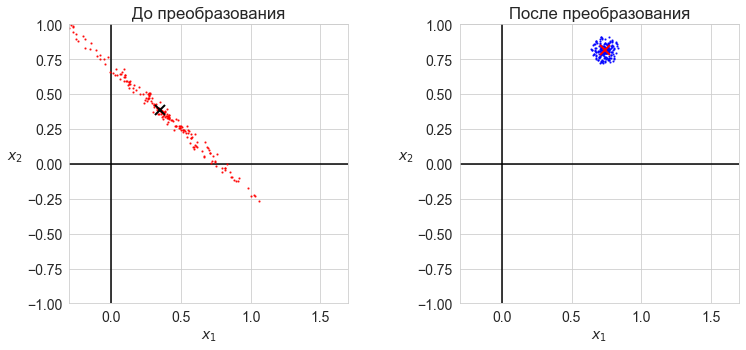

In [67]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

plt.subplots_adjust(wspace=0.4)
xlims = [-0.3, 1.7]
ylims = [-1.0, 1.0]

# Plotting X
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.plot(X[0,:], X[1,:], 'ro', ms=1.2, alpha=0.8)
ax1.plot(x0[0], x0[1], 'kx', ms=10, mew=2)
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$', rotation=0, ha='right')
ax1.set_xlim(xlims)
ax1.set_ylim(ylims)
ax1.set_aspect('equal')
ax1.set_axisbelow(True)
ax1.set_title("До преобразования")

# Plotting Y
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.plot(B[0, :], B[1, :], 'bo', ms=1.2, alpha=0.8)
ax2.plot(b0[0], b0[1], 'rx', ms=10, mew=2)
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$', rotation=0, ha='right')
ax2.set_xlim(xlims)
ax2.set_ylim(ylims)
ax2.set_aspect('equal')
ax2.set_axisbelow(True)
ax2.set_title("После преобразования")

plt.show()

In [68]:
# x_sol = np.array([1.0, 0.0]).T
dx = X - x0
db = B - b0

k1 = np.array(list(map(LA.norm, db.T))) / LA.norm(b0)
k2 = np.array(list(map(LA.norm, dx.T))) / LA.norm(x0)

print('Максимальное относительное увеличение возмущения max(dx/x : db/b) = ', round(max(k2/k1), 4))

Максимальное относительное увеличение возмущения max(dx/x : db/b) =  22.1528


1. **Вопрос**: Если известен вектор $\mathbf{b}$, как сделать более точную оценку возрастания относительной погрешности? \
   **Ответ**: Оценка даётся по формуле
   $$ \frac{\|\delta \mathbf{x}\|}{\|\mathbf{x}\|} \le \frac{\|A^{-1}\| \|\mathbf{b}\|}{\|A^{-1} \mathbf{b}\|} \frac{\|\delta \mathbf{b}\|}{\|\mathbf{b}\|}. $$
   Величина $\nu(A, b) = \frac{\|A^{-1}\| \|\mathbf{b}\|}{\|A^{-1} \mathbf{b}\|}$ называется *числом обусловленности системы при заданной правой части* и показывает, во сколько раз моежт возрасти относительная погрешность решения по сравнению с погрешностью правой части при решении системы $A\mathbf{x} = \mathbf{b}$.

$$ \nu = \frac{1}{\sigma_1} \frac{\|\mathbf{b}\|}{\|\mathbf{x}\|}  $$

In [72]:
nu = 1 / sgm[1] * LA.norm(b0) / LA.norm(x0)
print('|b| = |Ax| = ', LA.norm(b0))
print('|A|*|x| = ', sgm[0]*LA.norm(x0))
print('nu = ', round(nu, 4))

|b| = |Ax| =  1.0999999999999996
|A|*|x| =  1.0999999999999988
nu =  22.1549


---

## Расстояние Махаланобиса

1. **Вопрос**: Рассмотрим набор точек, подчиняющийся многомерному нормальному распределению и образующий класс. Как вычислить расстояние от некоторых выбранных точек до &laquo;центра масс&raquo; класса?\
   **Ответ**: Сначала нужно преобразовать данные (привести эллиптическое облако к круглой форме), а затем посчитать обычное евклидово расстояние. В итоге получиться расстояние Махаланобиса (показать это).

---

## Регрессия L1

In [11]:
from scipy.optimize import minimize

In [12]:
## L1 optimization to reject outlier
def L1_norm(a):
    return np.linalg.norm(a*x-b,ord=1)

In [13]:
aL1, aL2 = [0, 0], [0, 0]

x = np.sort(4*(np.random.rand(25,1)-0.5),axis=0) # Random data from [-2,2]
b = 0.5*x + 0.1*np.random.randn(len(x),1)  # Line y = 0.5x with noise
res = np.linalg.lstsq(x,b,rcond=None)[0] # Least-squares slope (no outliers)
aL2[0] = res.item(0)

a0 = aL2[0]   # initialize to L2 solution
res = minimize(L1_norm, a0)
# print(res)
aL1[0] = res.x[0]  # aL1 is robust

In [14]:
b[-1] = -5  # Introduce outlier
res = np.linalg.lstsq(x,b,rcond=None)[0] # New slope
aL2[1] = res.item(0)

a0 = aL2[1]   # initialize to L2 solution
res = minimize(L1_norm, a0)
# print(res)
aL1[1] = res.x[0]  # aL1 is robust

In [15]:
print(aL2)
print(aL1)

[0.4948339048519728, 0.21992690643482157]
[0.4963092036984735, 0.49630920494690783]


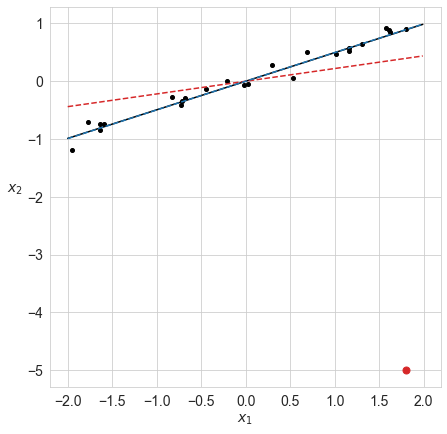

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(7,7))

# Plotting X
ax.plot(x[:-1],b[:-1],'ko')           # Data
ax.plot(x[-1],b[-1],'o',c=cm(3),ms=7) # Outlier

xgrid = np.arange(-2,2,0.01)
ax.plot(xgrid,aL2[0]*xgrid,'k-')         # L2 fit (no outlier)
ax.plot(xgrid,aL2[1]*xgrid,'--',c=cm(3)) # L2 fit (outlier)
ax.plot(xgrid,aL1[1]*xgrid,'--',c=cm(0)) # L1 fit (outlier)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$', rotation=0, ha='right')
# ax.set_ylim([-2, 2])
plt.show()